In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv("E:\MNS-UET BS IT\AICP ML INTERNSHIP\ML Internship Task 4\ML Internship Task 4/userbehaviour.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  
0        9                     7                  2990    Installed  
1        4                     8                 24008  Uninstalled  
2        8                     5                   971    Installed  
3        6                     2                   799    Installed  
4        5                     6                  3668    Installed  
userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
R

In [24]:
# // Question No. 1 \\

import pandas as pd

# Import data
df = pd.read_csv("E:\MNS-UET BS IT\AICP ML INTERNSHIP\ML Internship Task 4\ML Internship Task 4/userbehaviour.csv")

# Check for null values
print("Null values:\n", df.isnull().sum())

# Column info
print("\nColumn info:\n", df.info())

# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())


Null values:
 userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
mem

In [25]:
# // Question No. 2 \\

# Highest screen time
highest_screen_time = df['Average Screen Time'].max()
print("Highest screen time:", highest_screen_time)

# Lowest screen time
lowest_screen_time = df['Average Screen Time'].min()
print("Lowest screen time:", lowest_screen_time)

# Average screen time
average_screen_time = df['Average Screen Time'].mean()
print("Average screen time:", average_screen_time)


Highest screen time: 50.0
Lowest screen time: 0.0
Average screen time: 24.39039039039039


In [26]:
# // Question No. 3 \\

# Highest amount spent
highest_spent = df['Average Spent on App (INR)'].max()
print("Highest amount spent:", highest_spent)

# Lowest amount spent
lowest_spent = df['Average Spent on App (INR)'].min()
print("Lowest amount spent:", lowest_spent)

# Average amount spent
average_spent = df['Average Spent on App (INR)'].mean()
print("Average amount spent:", average_spent)


Highest amount spent: 998.0
Lowest amount spent: 0.0
Average amount spent: 424.4154154154154


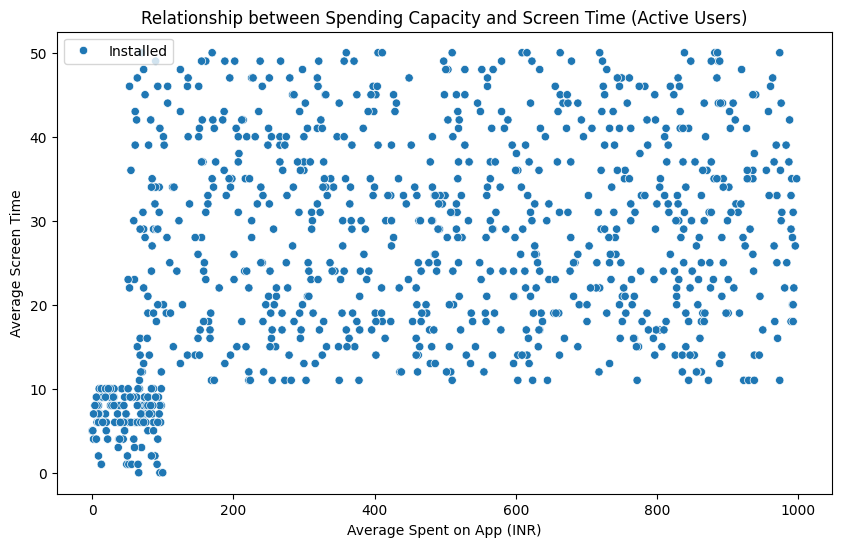

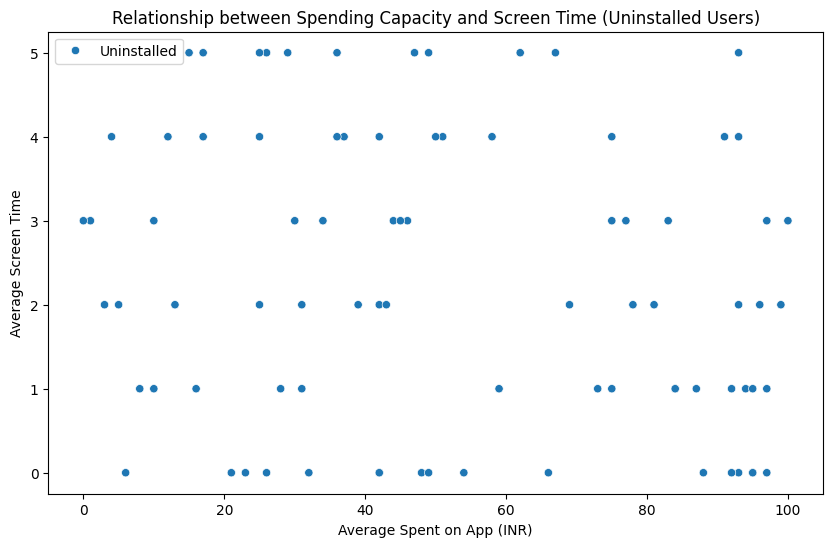

In [27]:
# // Question No. 4 \\

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for active users
active_users = df[df['Status'] == 'Installed']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=active_users, x='Average Spent on App (INR)', y='Average Screen Time', hue='Status')
plt.title('Relationship between Spending Capacity and Screen Time (Active Users)')
plt.xlabel('Average Spent on App (INR)')
plt.ylabel('Average Screen Time')
plt.legend(loc='upper left')
plt.show()

# Scatter plot for users who uninstalled the app
uninstalled_users = df[df['Status'] == 'Uninstalled']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uninstalled_users, x='Average Spent on App (INR)', y='Average Screen Time', hue='Status')
plt.title('Relationship between Spending Capacity and Screen Time (Uninstalled Users)')
plt.xlabel('Average Spent on App (INR)')
plt.ylabel('Average Screen Time')
plt.legend(loc='upper left')
plt.show()


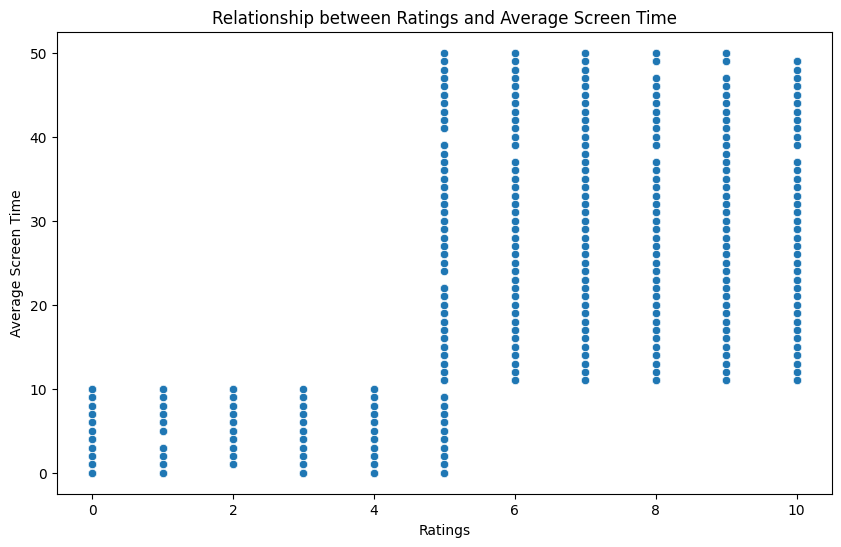

In [28]:
# // Question No. 5 \\

# Scatter plot for ratings and average screen time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Average Screen Time')
plt.title('Relationship between Ratings and Average Screen Time')
plt.xlabel('Ratings')
plt.ylabel('Average Screen Time')
plt.show()


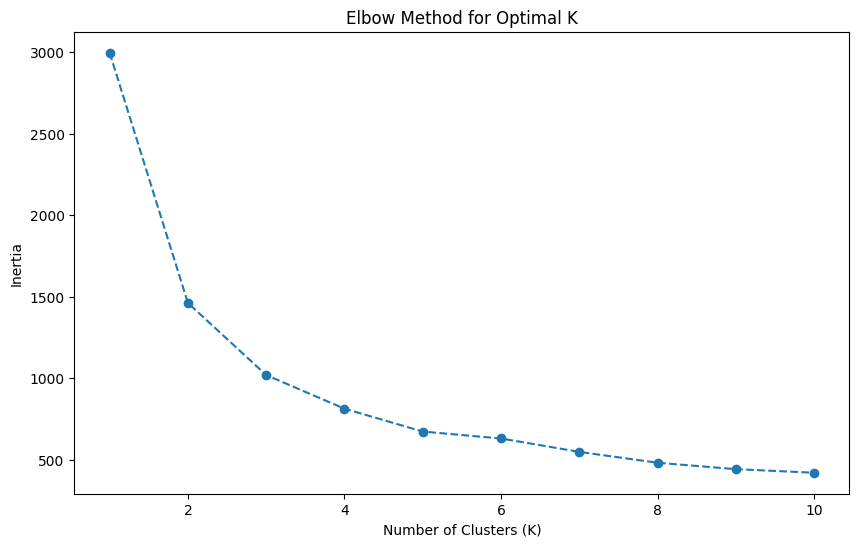

In [29]:
# // Question No. 6 \\

from sklearn.cluster import KMeans

# Select relevant features for clustering
X = df[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings']]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (K) using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [30]:
# Perform K-means clustering with the optimal number of clusters
k = 3  # Example: Assuming optimal K is 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Number of segments
num_segments = len(df['Cluster'].unique())
print("Number of segments:", num_segments)


Number of segments: 3


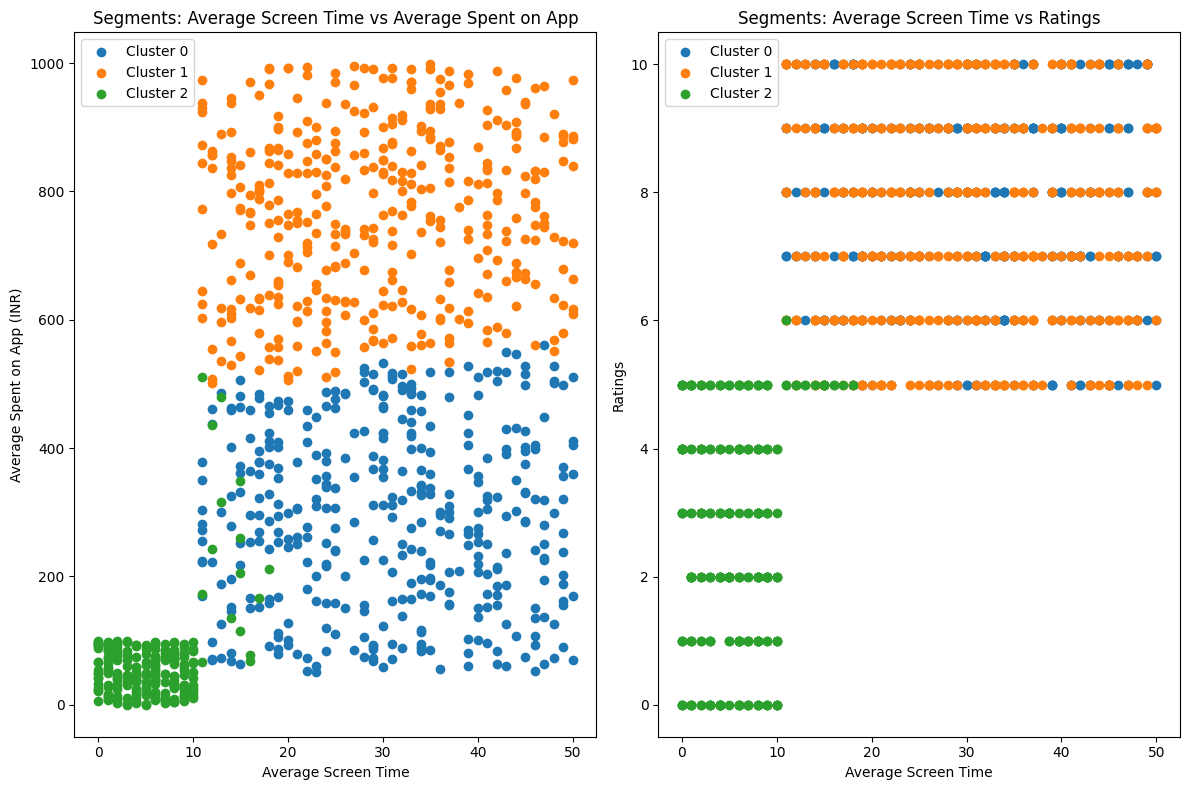

In [31]:
# // Question No. 7 \\

# Visualize segments using scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot for Average Screen Time vs Average Spent on App
plt.subplot(1, 2, 1)
for cluster in range(num_segments):
    plt.scatter(df[df['Cluster'] == cluster]['Average Screen Time'], 
                df[df['Cluster'] == cluster]['Average Spent on App (INR)'],
                label=f'Cluster {cluster}')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.title('Segments: Average Screen Time vs Average Spent on App')
plt.legend()

# Scatter plot for Average Screen Time vs Ratings
plt.subplot(1, 2, 2)
for cluster in range(num_segments):
    plt.scatter(df[df['Cluster'] == cluster]['Average Screen Time'], 
                df[df['Cluster'] == cluster]['Ratings'],
                label=f'Cluster {cluster}')
plt.xlabel('Average Screen Time')
plt.ylabel('Ratings')
plt.title('Segments: Average Screen Time vs Ratings')
plt.legend()

plt.tight_layout()
plt.show()
